In [82]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


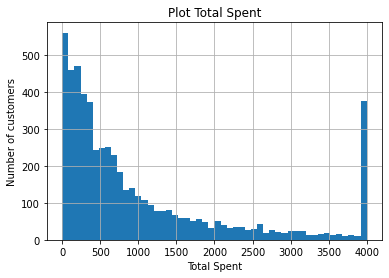

2863
1762
950


In [83]:
df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
for i in range(len(df)):
    if(df["Ts"].iloc[i]>4000):
        df["Ts"].iloc[i] = 4000

df["Ts"].hist(bins=50)
plt.title("Plot Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Number of customers")
plt.show()
low_value=600
high_value=2000
low=len(df[df["Ts"]<low_value])
high=len(df[df["Ts"]>high_value])
print(low) 
print(len(df[(df["Ts"]>=low_value) & (df["Ts"]<=high_value)]))
print(high)  

In [84]:
temp = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
output = []
for i in range(len(temp)):
    if(df["Ts"].iloc[i]<low_value):
         output.append(0)
    elif(df["Ts"].iloc[i]>high_value):
         output.append(2)
    else:
        output.append(1)

temp["class"] = output

In [85]:
temp.groupby("class").mean()

,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
class,,,,,,,,,,,
0,140.771219,21.448830,29.873559,3.593215,2.512345,197.020521,248.260042,13.088613,27.431366,0.0,0.176118
1,614.546538,70.297389,64.196935,5.656592,2.502923,510.600500,1088.725142,36.711388,84.425653,0.0,0.789469
2,3841.058947,150.222105,190.962105,6.537185,2.498842,951.347496,6808.562380,31.096942,80.080000,0.0,1.519346


In [86]:
print(len(temp[(temp["class"]==0) & (temp["Ts"]<198)]) )
print(len(temp[(temp["class"]==1) & (temp["Ts"]<1089)]) )
print(len(temp[(temp["class"]==2) & (temp["Ts"]>3243)]) )

1260
1016
493


In [87]:
def label(bins=0,label=0):
    temp[temp["class"]==label]["Ts"].hist(bins=bins)
    plt.title("Plot Total Spent")
    plt.xlabel("Total Spent")
    plt.ylabel("Number of customers")
    plt.show()

    temp[temp["class"]==label]["Ts"].plot.box()
    plt.title("Boxplot Total Spent")
    plt.show()

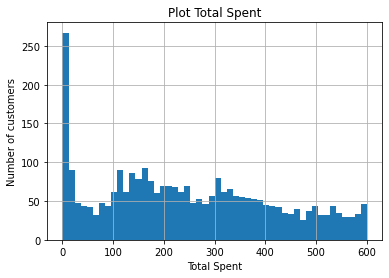

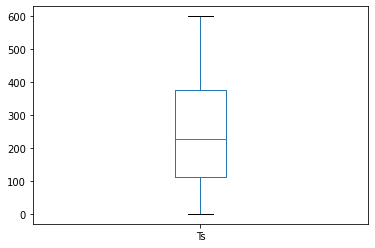

In [88]:
label(bins=50,label=0)

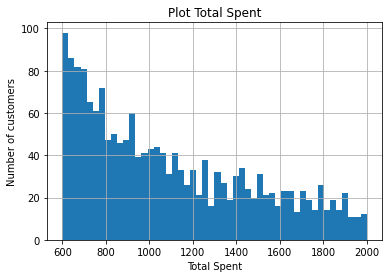

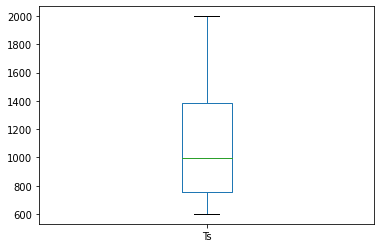

In [89]:
label(bins=50,label=1)

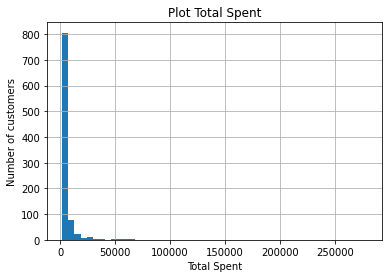

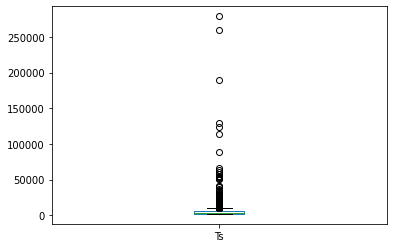

In [90]:
label(bins=50,label=2)

In [91]:
temp = temp.drop(columns=["I","Iu","Ts","MaxD","MinD"])

In [92]:
temp.head()

,CustomerID,Imax,E,PIL,Mb,MeanD,EDate,class
0,17850.0,12,4.335643,2.567,156.860294,0.000000,0.000000,2
1,13047.0,32,6.503112,2.567,356.232222,35.000000,2.226424,2
2,12583.0,360,6.504979,2.752,442.969333,24.266667,2.235084,2
3,13748.0,80,4.494680,2.567,189.650000,55.400000,1.177965,1
4,15100.0,32,0.000000,2.567,292.000000,13.000000,0.918296,1
